### Data Mining and Machine Learning
### Decision Trees
#### Edgar Acuna
#### Abril 2021

In [47]:
import numpy as np
import pandas as pd
import graphviz
#import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

### I. Decision Trees applied to the prediction of final grade based on Ex1 and Ex2

In [48]:
df=pd.read_csv("http://academic.uprm.edu/eacuna/eje1dis.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   E1      32 non-null     int64 
 1   E2      32 non-null     int64 
 2   PF      32 non-null     int64 
 3   Nota    32 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.1+ KB


In [49]:
#Convirtiendo en matriz la tabla de predictoras y la columna de clases
y=df['Nota']
X=df.iloc[:,0:2]


In [50]:
#Construyendo el arbol con 2 niveles de profundidad y graficandola usando graphviz
modeltree = tree.DecisionTreeClassifier(max_depth=2)
modeltree = modeltree.fit(X,y)
pred=modeltree.predict(X)
print(pred)

['p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'f' 'p' 'p' 'p' 'p' 'p' 'p'
 'p' 'p' 'p' 'p' 'p' 'p' 'f' 'f' 'f' 'f' 'f' 'f' 'p' 'f']


There are two errors

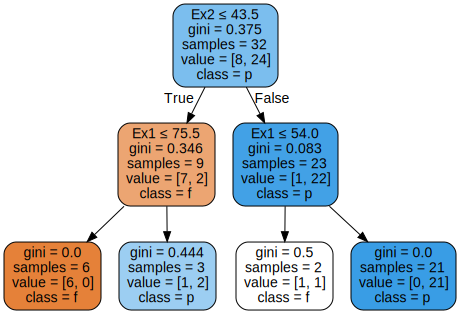

In [51]:
names=["Ex1","Ex2"]
clases=['f','p']
dot_data = tree.export_graphviz(modeltree, out_file=None, 
                         feature_names=names,  
                         class_names=clases,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data)
graph

### Ploting the decision line

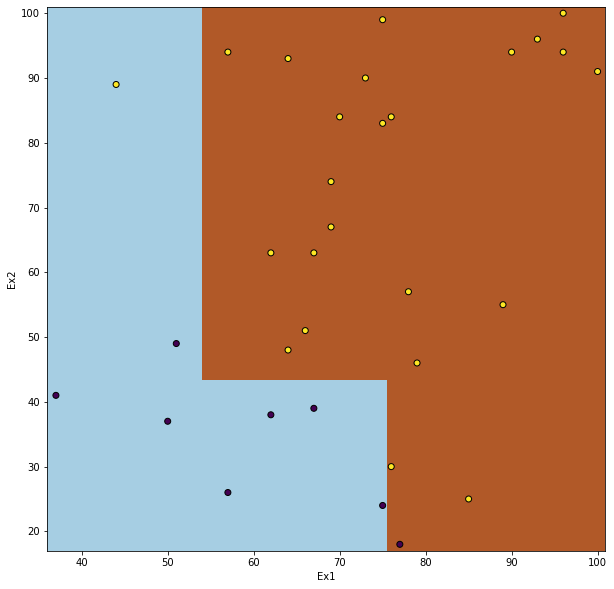

In [52]:
# Ploting the decision lines
lb_make = LabelEncoder()
df["pass"] = lb_make.fit_transform(df["Nota"])
y2=df['pass']
y1=y2.to_numpy()
X1=X.to_numpy()
clf = tree.DecisionTreeClassifier(max_depth=2).fit(X1, y1)
# Plot the decision boundary
#plt.subplot(1, 1, pairidx + 1)
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
eje1=np.arange(start = X1[:, 0].min()-1, stop = X1[:, 0].max() + 1, step = 0.1)
eje2=np.arange(start = X1[:, 1].min()-1, stop = X1[:, 1].max() + 1, step = 0.11)
xx, yy = np.meshgrid(eje1,eje2)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(xx, yy, Z,cmap=plt.cm.Paired)
# Plot also the training points#
plt.scatter(X1[:, 0], X1[:, 1], c=y2, edgecolors='black')
plt.xlabel('Ex1')
plt.ylabel('Ex2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

Constructing a tree with 2 levels of depth and using the entropy as impurity measure

In [53]:
#Construyendo el arbol con 2 niveles de profundidad y la Entropia come medida de impureza
modeltree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=2)
modeltree = modeltree.fit(X1,y1)

In [54]:
names=["Ex1","Ex2"]
clases=['f','p']
dot_data = tree.export_graphviz(modeltree, out_file=None, 
                         feature_names=names,  
                         class_names=clases,  
                         filled=True, rounded=True,  
                         special_characters=True)  
#graph = graphviz.Source(dot_data)  
#graph 

### II. Applying Decision Trees to the loan dataset

In [55]:
df = pd.read_csv("https://academic.uprm.edu/eacuna/datosarbol.csv")
y=df['Prestamo']
data=df.iloc[:,0:6]
#Codificando 0-1 las Variables Sexo y CasPropia
lb_make = LabelEncoder()
data["Sexo"] = lb_make.fit_transform(data["Sexo"])
data['CasPropia']=lb_make.fit_transform(data["CasPropia"])
data1=data['StatustMarital']
#Aplicando OneHot encoding a la predictora StatustMarital
data2=pd.get_dummies(data1,prefix=['StatustMarital'])
data3=pd.concat([data.iloc[:,0:5],data2],axis=1)
y2=lb_make.fit_transform(y)
#Haciendo la regresion logistica ya calculando su precision
#Construyendo el arbol con 3 niveles de profundidad y graficandola usando graphviz
#Despues de instalar Grpahviz dar el comando dot -Tpng tree.dot -o tree.png
modeltree = tree.DecisionTreeClassifier(max_depth=2,criterion='entropy')
modeltree = modeltree.fit(data3,y2)
data3.head()

,Sexo,Familia,CasPropia,AnosEmpleo,Sueldo,['StatustMarital']_Casado,['StatustMarital']_Divorciado,['StatustMarital']_Soltero,['StatustMarital']_Viudo
0,0,3,0,17,2500,0,0,1,0
1,1,5,1,10,3000,1,0,0,0
2,1,4,0,15,2000,0,0,0,1
3,0,3,1,16,2800,0,0,1,0
4,0,6,1,11,4000,0,0,0,1


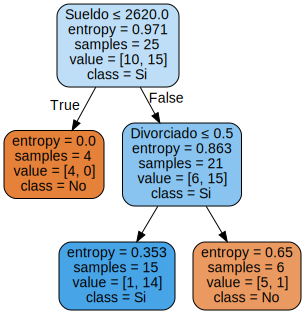

In [56]:
names=['Sexo',  'Familia',  'CasPropia',  'AnosEmpleo',  'Sueldo',  'Casado','Divorciado',"Soltero","Viudo"]
clases=['No','Si']
dot_data = tree.export_graphviz(modeltree, out_file=None, 
                         feature_names=names,  
                         class_names=clases,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

#### Notar que el split con la variable categoria no es entendible

### Finding the accuracy by resubstitution

In [57]:
#Finding the accuracy by resubstitution
pred=modeltree.predict(data3)
acc=(y2==pred).mean()
print("The predictions are", pred,"\n","The accurracy is=",acc)

The predictions are [0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1] 
 The accurracy is= 0.92


### III. Decision trees applied to the Diabetes dataset but using only two predictors

In [58]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names,header=None)
#La variable de respuesta y debe ser binaria (0,1)
y=data['class']-1
X=data[['plas','mass']]
modeltree = tree.DecisionTreeClassifier(max_depth=5)
modeltree = modeltree.fit(X,y)

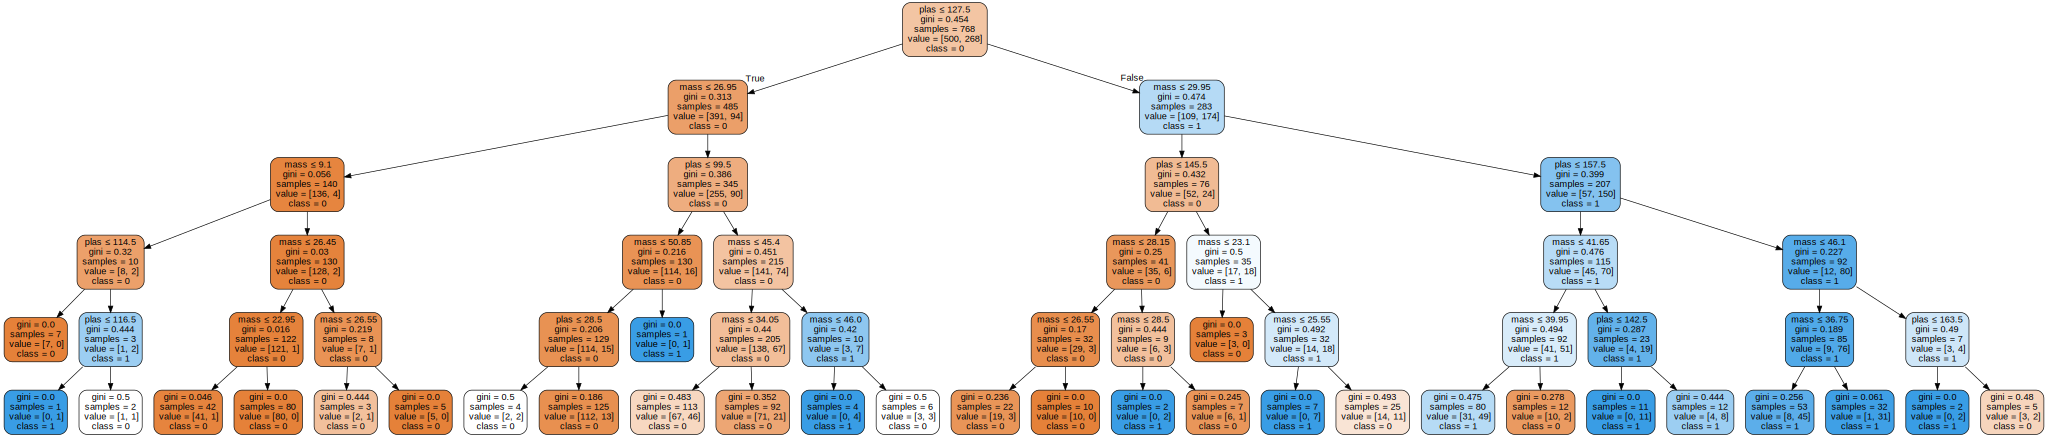

In [59]:
names=["plas","mass"]
clases=['0','1']
dot_data = tree.export_graphviz(modeltree, out_file=None, 
                         feature_names=names,  
                         class_names=clases,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### Showing the decision line

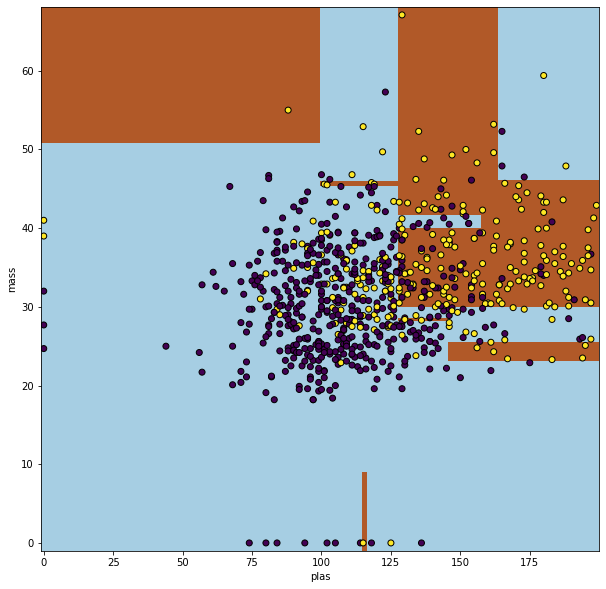

In [61]:
y2=data['class']
y1=y2.to_numpy()
X1=X.to_numpy()
clf = tree.DecisionTreeClassifier(max_depth=5).fit(X1, y1)
# Plot the decision boundary
#plt.subplot(1, 1, pairidx + 1)
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
eje1=np.arange(start = X1[:, 0].min()-1, stop = X1[:, 0].max() + 1, step = 0.1)
eje2=np.arange(start = X1[:, 1].min()-1, stop = X1[:, 1].max() + 1, step = 0.11)
xx, yy = np.meshgrid(eje1,eje2)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(xx, yy, Z,cmap=plt.cm.Paired)
# Plot also the training points#
plt.scatter(X1[:, 0], X1[:, 1], c=y2, edgecolors='black')
plt.xlabel('plas')
plt.ylabel('mass')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show() 